In [1]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
%matplotlib inline

## load and prepare result of FPgrowth algorithm 

In [2]:
# load rules csv in columns with list format
df=pd.read_csv("data/rules_0.0001_0.001.csv", converters={'antecedent': literal_eval,'consequent': literal_eval})
df.head(3)

,antecedent,consequent,confidence,lift,support
0,[739590033],[860949003],0.876498,6470.533310,0.000105
1,[590928001],[688537004],0.213753,131.632335,0.000306
2,[590928001],[712924012],0.130234,357.050472,0.000187


In [3]:
len(df)

552

In [4]:
# Check if there are some sets of atecedents with more than one member
df['len']=df['antecedent'].apply(lambda x: len(x))
df[df['len']>1]

,antecedent,consequent,confidence,lift,support,len


In [5]:
# convert strings of articles to integer(article id)
df["antecedent"] = df["antecedent"].apply(lambda x: list(map(int,x)))
df["consequent"] = df["consequent"].apply(lambda x: list(map(int,x)))

## load article csv and create dictionary of article ids and names of products  

In [6]:
# load articles
dfa=pd.read_csv('data/articles.csv')
dfa=dfa[['article_id','prod_name','product_type_name','product_group_name','graphical_appearance_name','colour_group_name']]

In [7]:
# generate dictionary key: article_id, value: product_name,...
dfa_dict=dfa.set_index('article_id').to_dict('index')

## select the articles that are bought together more often 

In [8]:
# select the products that are bought together with high confidence
confidence_high = 0.75
df_most=df[df['confidence']>=confidence_high].sort_values(by=['confidence'],ascending=False)
df_most.head(7)

,antecedent,consequent,confidence,lift,support,len
512,[810419006],[800389007],0.925075,7574.252397,0.000102,1
162,[823165002],[823118002],0.916078,3985.697098,0.000114,1
271,[799410003],[799409003],0.910387,4512.268889,0.000148,1
446,[712924008],[590928019],0.910326,2380.738427,0.000295,1
110,[739590022],[559616017],0.908894,2448.210493,0.000138,1
168,[699077006],[699075005],0.907801,2656.461288,0.000268,1
475,[712924014],[590928023],0.905922,2022.107737,0.000266,1


In [9]:
len(df_most)

89

In [10]:
# create lists of associated products
itemsets_most=[]
for i,j in zip(list(df_most["antecedent"]),list(df_most["consequent"])):
    itemsets_most.append(i+j)

In [11]:
# with having article ids, we extract other products' information for these ids (name,type,group,graphical appearance, color)


dff=pd.DataFrame()
for i in range(len(itemsets_most)):
    for r in itemsets_most[i]:
        d= dfa_dict[r].copy()
        d.update(dict({'Associated_id': i}))
        dff=pd.concat([dff,pd.DataFrame([d])],ignore_index=True)

In [12]:
dff_id=dff.set_index('Associated_id')

In [13]:
dff_id

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name
Associated_id,,,,,
0,Timeless Tanga,Swimwear bottom,Swimwear,Solid,Dark Beige
0,Timeless High Apex Tri Top,Bikini top,Swimwear,Solid,Dark Beige
1,Ginger Highwaist,Swimwear bottom,Swimwear,Stripe,White
1,Ginger Top,Bikini top,Swimwear,Stripe,White
2,Kanye Vest Mid Brief,Swimwear bottom,Swimwear,Solid,Dark Orange
...,...,...,...,...,...
86,Baby Love Cheeky Brief,Swimwear bottom,Swimwear,All over pattern,Off White
87,Baby Love Tri. Top,Bikini top,Swimwear,Other structure,Dark Blue
87,Baby Love Cheeky Brief,Swimwear bottom,Swimwear,Other structure,Dark Blue


### frequently bought together stats

Text(0.5, 1.0, 'Type of products which are bought together most frequently')

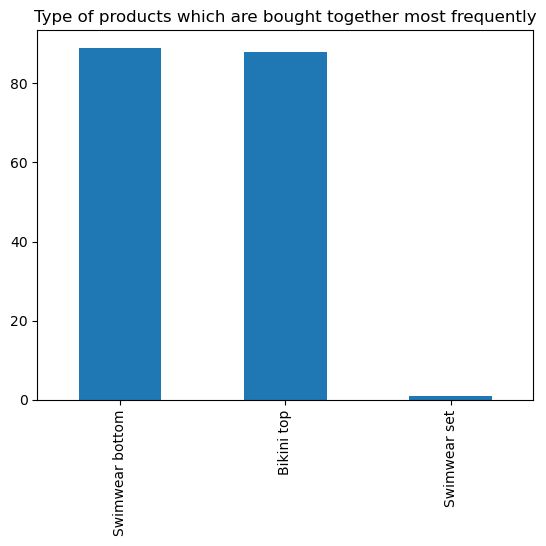

In [14]:
# product type
#plt.figure(figsize=[4,3],dpi=200)
dff_id.product_type_name.value_counts().plot.bar()
plt.title('Type of products which are bought together most frequently')
#plt.xticks(rotation =0)

Text(0.5, 1.0, 'Graphical appearance of products which are bought together most frequently')

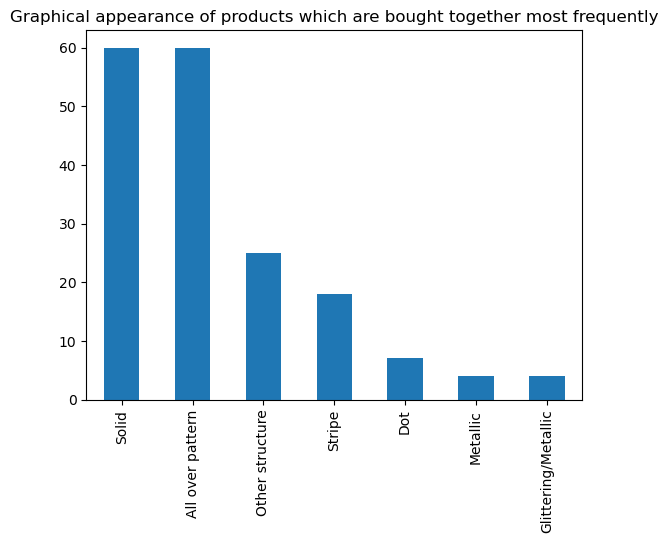

In [15]:
# product's appearance
dff_id.graphical_appearance_name.value_counts().plot.bar()
plt.title('Graphical appearance of products which are bought together most frequently')
#plt.xticks(rotation = 45)

Text(0.5, 1.0, 'Color of products which are bought together most frequently')

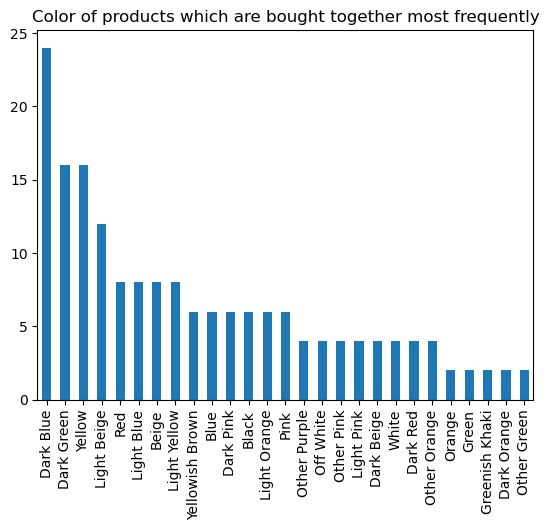

In [16]:
# product's color
dff_id.colour_group_name.value_counts().plot.bar()
plt.title('Color of products which are bought together most frequently')

## select the articles that are bought together less often

In [17]:
# select the products that are bought together with low confidence
confidence_low=0.15
df_least=df[df['confidence']< confidence_low].sort_values(by=['confidence'])
df_least.head()

,antecedent,consequent,confidence,lift,support,len
485,[706016001],[554450001],0.025340,17.870156,0.000118,1
480,[706016001],[706016019],0.025601,45.456790,0.000119,1
294,[610776002],[610776028],0.045726,73.629682,0.000126,1
130,[673677002],[673677004],0.050734,74.748216,0.000100,1
483,[706016001],[706016006],0.052271,40.912604,0.000243,1


In [18]:
# create lists of less associated products
itemsets_least=[]
for i,j in zip(list(df_least["antecedent"]),list(df_least["consequent"])):
    itemsets_least.append(i+j)

In [19]:
# with having article ids, we extract other products' information for these ids (name,type,group,graphical appearance, color)
names_least=[]
dfi=pd.DataFrame()
for i in range(len(itemsets_least)):
    names_least.append([dfa_dict[x] for x in itemsets_least[i]])
    for r in itemsets_least[i]:
        d= dfa_dict[r].copy()
        d.update(dict({'Associated_id': i}))
        dfi=pd.concat([dfi,pd.DataFrame([d])],ignore_index=True)

In [20]:
dfi_id=dfi.set_index('Associated_id')

In [21]:
# some of names are the same. The reason is that some products with the same name have different article ids.
# For instance, as you can see in the next cell two articles have the same name and different colors.
dfi_id

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name
Associated_id,,,,,
0,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Black
0,Julia RW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Black
1,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Black
1,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Dark Blue
2,Tilly (1),T-shirt,Garment Upper body,Solid,Black
...,...,...,...,...,...
72,Henry polo. (1),Sweater,Garment Upper body,Solid,Black
73,Highwaist 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black
73,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black


In [22]:
# some articles have same name and different ids
dfa[(dfa['article_id']==706016001) | (dfa['article_id']==706016019)]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name
53892,706016001,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Black
53904,706016019,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Dark Blue


In [32]:
# Sets of articles that contains articles with different names
names_least_unique = [item for item in names_least if (item[0]!=item[1])]
print(len(names_least_unique))
names_least_unique[:2]

71


[[{'prod_name': 'Jade HW Skinny Denim TRS',
   'product_type_name': 'Trousers',
   'product_group_name': 'Garment Lower body',
   'graphical_appearance_name': 'Solid',
   'colour_group_name': 'Black'},
  {'prod_name': 'Julia RW Skinny Denim TRS',
   'product_type_name': 'Trousers',
   'product_group_name': 'Garment Lower body',
   'graphical_appearance_name': 'Solid',
   'colour_group_name': 'Black'}],
 [{'prod_name': 'Jade HW Skinny Denim TRS',
   'product_type_name': 'Trousers',
   'product_group_name': 'Garment Lower body',
   'graphical_appearance_name': 'Solid',
   'colour_group_name': 'Black'},
  {'prod_name': 'Jade HW Skinny Denim TRS',
   'product_type_name': 'Trousers',
   'product_group_name': 'Garment Lower body',
   'graphical_appearance_name': 'Solid',
   'colour_group_name': 'Dark Blue'}]]

### infrequently bought together stats

Text(0.5, 1.0, 'Group of products which are bought together less frequently')

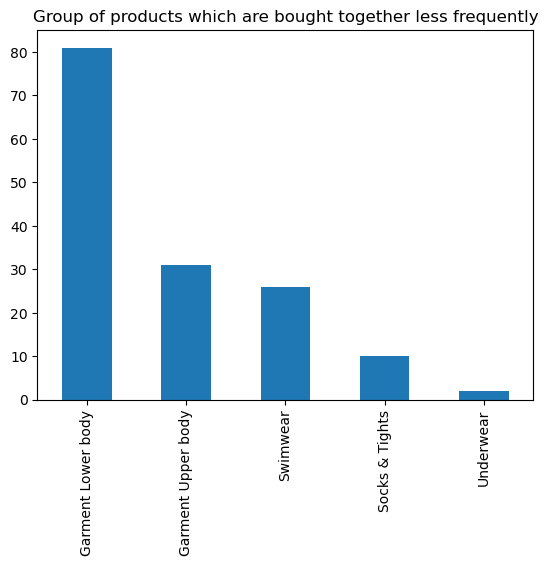

In [24]:
# product group
dfi_id.product_group_name.value_counts().plot.bar()
plt.title('Group of products which are bought together less frequently')

## (Time series) show an example of two items are often being sold together

In [25]:
df=pd.read_csv('data/transactions_train.csv')

In [26]:
df=df[['t_dat','customer_id','article_id']]
df=df.drop_duplicates(['t_dat','customer_id','article_id'])

In [27]:
df_ = df[(df['article_id']==810419006) | (df['article_id']==800389007)][['t_dat','article_id']]
df_['t_dat']= pd.to_datetime(df_['t_dat'], format='%Y-%m-%d')
df_c=df_.groupby(['article_id','t_dat'])['article_id'].count().reset_index(name='count').set_index('t_dat')

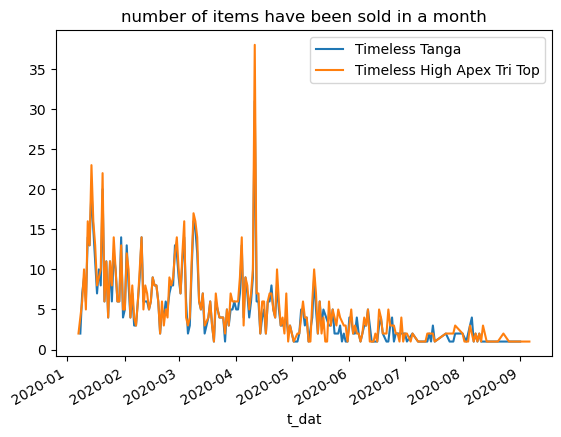

In [28]:
# plot the shopping pattern for the items in shopping baskets
import matplotlib.pyplot as plt
fig=plt.figure()
df_c[df_c['article_id']==810419006]['count'].plot(label='Timeless Tanga',legend=True,title='number of items have been sold in a month')
df_c[df_c['article_id']==800389007]['count'].plot(label='Timeless High Apex Tri Top',legend=True)
fig.savefig('together.jpg', format='jpg', dpi=800)

## (Time series) show an example of two items are often being sold together

In [29]:
df_ = df[(df['article_id']==706016001) | (df['article_id']==554450001)][['t_dat','article_id']]
df_['t_dat']= pd.to_datetime(df_['t_dat'], format='%Y-%m-%d')
df_c=df_.groupby(['article_id','t_dat'])['article_id'].count().reset_index(name='count').set_index('t_dat')

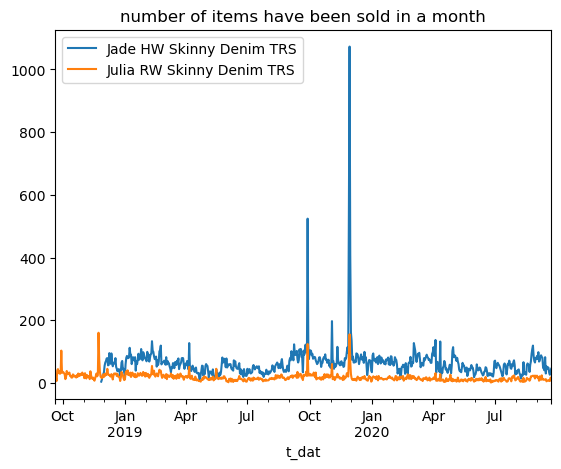

In [30]:
# plot the shopping pattern for the items in shopping baskets
import matplotlib.pyplot as plt
fig=plt.figure()
df_c[df_c['article_id']==706016001]['count'].plot(label='Jade HW Skinny Denim TRS',legend=True,title='number of items have been sold in a month')
df_c[df_c['article_id']==554450001]['count'].plot(label='Julia RW Skinny Denim TRS',legend=True)
fig.savefig('nottogether.jpg', format='jpg', dpi=800)